In [1]:
from pyspark.sql import  SQLContext 
from pyspark import SparkContext
from pyspark.ml.regression import LinearRegression # 선형회귀
from pyspark.ml.feature import VectorAssembler # 특성 데이터를 하나로 묶어줌
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False

In [2]:
sc = SparkContext('local')
sqlctx = SQLContext(sc)

In [4]:
# 자동차 속도와 제동거리 관련 데이터 불러오기

cardf = sqlctx.read.csv( '../data/cars.csv', header=True, inferSchema=True)
cardf.show()

+---+-----+----+
|_c0|speed|dist|
+---+-----+----+
|  1|    4|   2|
|  2|    4|  10|
|  3|    7|   4|
|  4|    7|  22|
|  5|    8|  16|
|  6|    9|  10|
|  7|   10|  18|
|  8|   10|  26|
|  9|   10|  34|
| 10|   11|  17|
| 11|   11|  28|
| 12|   12|  14|
| 13|   12|  20|
| 14|   12|  24|
| 15|   12|  28|
| 16|   13|  26|
| 17|   13|  34|
| 18|   13|  34|
| 19|   13|  46|
| 20|   14|  26|
+---+-----+----+
only showing top 20 rows



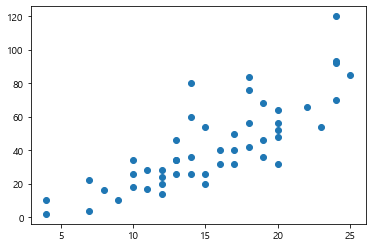

In [6]:
pdCar = cardf.toPandas()
plt.scatter(pdCar['speed'], pdCar['dist'])
plt.show()

In [ ]:
# 자동차 속도를 15로 했을 때 제동거리가 얼마로 예측되는가?
# y = wx + b
# w, b를 구하는 두 가지 방법 : 미분(공식), 학습

In [ ]:
# 1. 공식
# 2. 학습 

In [8]:
# 스파크 -> 여기에도 corr이 있음
# 판다스 아님

cardf.corr('dist', 'speed') # 강한 양적 상관관계(>=0.7)

# 상관관계가 높으면 학습이 잘됨 -> w,b를 잘 찾아줌

0.8068949006892103

In [ ]:
# x(자동차 속도) : 특성데이터(feature) N개면 다중선형회귀, 1개면 단일 선형회귀분석
# y(제동거리) : Label - 정답

In [10]:
# f = VectorAssembler(inputCols=['speed', 'engine'], outputCol='features') => ex. [4.0, 2.0]
f = VectorAssembler(inputCols=['speed'], outputCol='features') # 특성 데이터를 리스트 안에 묶어줌 - 학습 대상이 되는 칼럼
v_df = f.transform(cardf)
v_df.show()

+---+-----+----+--------+
|_c0|speed|dist|features|
+---+-----+----+--------+
|  1|    4|   2|   [4.0]|
|  2|    4|  10|   [4.0]|
|  3|    7|   4|   [7.0]|
|  4|    7|  22|   [7.0]|
|  5|    8|  16|   [8.0]|
|  6|    9|  10|   [9.0]|
|  7|   10|  18|  [10.0]|
|  8|   10|  26|  [10.0]|
|  9|   10|  34|  [10.0]|
| 10|   11|  17|  [11.0]|
| 11|   11|  28|  [11.0]|
| 12|   12|  14|  [12.0]|
| 13|   12|  20|  [12.0]|
| 14|   12|  24|  [12.0]|
| 15|   12|  28|  [12.0]|
| 16|   13|  26|  [13.0]|
| 17|   13|  34|  [13.0]|
| 18|   13|  34|  [13.0]|
| 19|   13|  46|  [13.0]|
| 20|   14|  26|  [14.0]|
+---+-----+----+--------+
only showing top 20 rows



In [11]:
v_df.count()

50

In [18]:
# 필요한 칼럼만 가져옴

v_df = v_df.select('features', 'dist')
v_df.show()

+--------+----+
|features|dist|
+--------+----+
|   [4.0]|   2|
|   [4.0]|  10|
|   [7.0]|   4|
|   [7.0]|  22|
|   [8.0]|  16|
|   [9.0]|  10|
|  [10.0]|  18|
|  [10.0]|  26|
|  [10.0]|  34|
|  [11.0]|  17|
|  [11.0]|  28|
|  [12.0]|  14|
|  [12.0]|  20|
|  [12.0]|  24|
|  [12.0]|  28|
|  [13.0]|  26|
|  [13.0]|  34|
|  [13.0]|  34|
|  [13.0]|  46|
|  [14.0]|  26|
+--------+----+
only showing top 20 rows



In [19]:
# train(w, b를 구하는 학습용 데이터셋)
# test(테스트하는 데이터셋)

# 랜덤하게 v_df 를 자르는데 비율을 줌
train_df, test_df = v_df.randomSplit([0.7, 0.3])

In [20]:
print(train_df.count()) # 70%의 학습용 데이터 셋 : 36개
train_df.show()

44
+--------+----+
|features|dist|
+--------+----+
|   [4.0]|   2|
|   [4.0]|  10|
|   [7.0]|   4|
|   [7.0]|  22|
|   [8.0]|  16|
|   [9.0]|  10|
|  [10.0]|  18|
|  [10.0]|  26|
|  [10.0]|  34|
|  [11.0]|  17|
|  [11.0]|  28|
|  [12.0]|  14|
|  [12.0]|  20|
|  [12.0]|  24|
|  [12.0]|  28|
|  [13.0]|  26|
|  [13.0]|  34|
|  [13.0]|  34|
|  [13.0]|  46|
|  [14.0]|  36|
+--------+----+
only showing top 20 rows



In [21]:
print(test_df.count()) # 30%의 학습용 데이터 셋 : 14개
test_df.show()

6
+--------+----+
|features|dist|
+--------+----+
|  [14.0]|  26|
|  [16.0]|  32|
|  [16.0]|  40|
|  [18.0]|  42|
|  [19.0]|  46|
|  [24.0]| 120|
+--------+----+



In [22]:
# maxIter, regParam : 하이퍼 파라미터(사람이 조정)
# maxIter : 몇 번 돌릴건지
# regParam : 러닝 보폭

lr = LinearRegression(featuresCol='features', labelCol='dist', maxIter=100, regParam=0.01)
lr_model = lr.fit(train_df) # 학습을 시작

In [26]:
#회귀 계수값( 기울기, 절편) y = wx +b  (w,b)
print("기울기(w) :",lr_model.coefficients )
print("절편(b) :", lr_model.intercept )

기울기(w) : [3.6912324286843443]
절편(b) : -13.733797732220928


In [28]:
# 자동차 속도가 15면 제동거리는 얼마로 에측되는가?
w = lr_model.coefficients[0] # 리스트 안에 감싸져 있어서 빼놓기 위해서 [0]
b = lr_model.intercept
p = w*15 + b
p

41.634688698044236

In [30]:
pdCar = cardf.toPandas()
pdCar['lr'] = w*pdCar['speed'] + b
pdCar

,_c0,speed,dist,lr
0,1,4,2,1.031132
1,2,4,10,1.031132
2,3,7,4,12.104829
3,4,7,22,12.104829
4,5,8,16,15.796062
5,6,9,10,19.487294
6,7,10,18,23.178527
7,8,10,26,23.178527
8,9,10,34,23.178527
9,10,11,17,26.869759


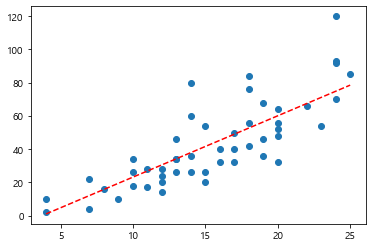

In [31]:
plt.scatter(pdCar['speed'], pdCar['dist'])
plt.plot(pdCar['speed'], pdCar['lr'], 'r--')
plt.show()